# Author - Deepak Kothari
## Stocks Closing Price Prediction - LSTM Model, Keras

In [5]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from keras import regularizers

In [6]:
# load dataset
dataframe = pd.read_csv("timeseriesdata.csv")

In [7]:
dataframe.sort_values(by='Date', inplace=True)

In [8]:
dataframe.shape

(1235, 8)

In [9]:
dataframe.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [10]:
dataframe.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83


In [11]:
date_df = pd.DataFrame(dataframe['Date'])

date_df['Date'] = date_df['Date'].astype('datetime64[ns]')
#date_df['weekend'] = ((date_df.Date.dt.dayofweek) // 5 == 1).astype(float)
date_df['weekday'] = date_df['Date'].apply(lambda x: x.weekday())
date_df['year']=date_df.Date.dt.year
date_df['month']=date_df.Date.dt.month 
date_df['day']=date_df.Date.dt.day
date_df['quarter'] = date_df.Date.dt.quarter
date_df['halfYear'] = date_df['quarter'].apply(lambda x: 1 if x < 3 else 2)

In [12]:
date_df.shape

(1235, 7)

In [13]:
date_df.head()

,Date,weekday,year,month,day,quarter,halfYear
1234,2013-10-08,1,2013,10,8,4,2
1233,2013-10-09,2,2013,10,9,4,2
1232,2013-10-10,3,2013,10,10,4,2
1231,2013-10-11,4,2013,10,11,4,2
1230,2013-10-14,0,2013,10,14,4,2


In [14]:
data = date_df.merge(dataframe, how="inner", left_index=True, right_index=True)

In [15]:
data.shape

(1235, 15)

In [16]:
data.head()

,Date_x,weekday,year,month,day,quarter,halfYear,Date_y,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,1,2013,10,8,4,2,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1233,2013-10-09,2,2013,10,9,4,2,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1232,2013-10-10,3,2013,10,10,4,2,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1231,2013-10-11,4,2013,10,11,4,2,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1230,2013-10-14,0,2013,10,14,4,2,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [17]:
data.drop(['Date_x', 'Date_y'], axis=1, inplace=True)

In [18]:
#Getting Unique values for column - year dataframe - data
year_columns = data['year'].unique()
year_columns.sort()
#Creating a list for  column
D = list(range(0, len(year_columns)))


#Creating a dictionary for each column with integer as value
year_columns_dict = dict(zip(year_columns,D))


#Mapping values encoded values to page_details dataframe
data['year'] = data['year'].map(year_columns_dict)

In [19]:
# Let's go ahead and plot out several moving averages of Closing Price
'''
5 - weekly
22 - monthly
50 - Quarterly
'''

ma_day = [5,22,50]

for ma in ma_day:
    column_name = "MA-%s-Days" %(str(ma))
    data[column_name] = pd.Series(data['Close']).rolling(window=ma).mean()

In [20]:
data.shape

(1235, 16)

In [21]:
data.head()

,weekday,year,month,day,quarter,halfYear,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),MA-5-Days,MA-22-Days,MA-50-Days
1234,1,0,10,8,4,2,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94,NaN,NaN,NaN
1233,2,0,10,9,4,2,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49,NaN,NaN,NaN
1232,3,0,10,10,4,2,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80,NaN,NaN,NaN
1231,4,0,10,11,4,2,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76,NaN,NaN,NaN
1230,0,0,10,14,4,2,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09,158.2,NaN,NaN


In [22]:
data.isnull().sum()

weekday                  0
year                     0
month                    0
day                      0
quarter                  0
halfYear                 0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
Total Trade Quantity     0
Turnover (Lacs)          0
MA-5-Days                4
MA-22-Days              21
MA-50-Days              49
dtype: int64

In [23]:
data.fillna(method='bfill', inplace=True)

In [24]:
cols = list(data.columns.values)

In [25]:
newCols = ['weekday','day','month','quarter','halfYear','year','Open','High','Low','Last','MA-5-Days','MA-22-Days','MA-50-Days',
           'Total Trade Quantity','Turnover (Lacs)','Close']

In [26]:
set(cols) - set(newCols)

set()

In [27]:
data = data[newCols]

In [28]:
data.head()

,weekday,day,month,quarter,halfYear,year,Open,High,Low,Last,MA-5-Days,MA-22-Days,MA-50-Days,Total Trade Quantity,Turnover (Lacs),Close
1234,1,8,10,4,2,0,157.00,157.80,155.20,155.8,158.2,162.186364,153.681,1720413.0,2688.94,155.80
1233,2,9,10,4,2,0,155.70,158.20,154.15,155.3,158.2,162.186364,153.681,2049580.0,3204.49,155.55
1232,3,10,10,4,2,0,156.00,160.80,155.85,160.3,158.2,162.186364,153.681,3124853.0,4978.80,160.15
1231,4,11,10,4,2,0,161.15,163.45,159.00,159.8,158.2,162.186364,153.681,1880046.0,3030.76,160.05
1230,0,14,10,4,2,0,160.85,161.45,157.70,159.3,158.2,162.186364,153.681,1281419.0,2039.09,159.45


In [29]:
data.tail()

,weekday,day,month,quarter,halfYear,year,Open,High,Low,Last,MA-5-Days,MA-22-Days,MA-50-Days,Total Trade Quantity,Turnover (Lacs),Close
4,0,1,10,4,2,5,234.55,234.60,221.05,230.30,233.65,230.406818,234.866,1534749.0,3486.05,230.90
3,2,3,10,4,2,5,230.00,237.50,225.75,226.45,231.95,230.090909,234.645,1708590.0,3960.27,227.60
2,3,4,10,4,2,5,223.50,227.80,216.15,217.25,228.74,229.281818,234.347,1728786.0,3815.79,218.20
1,4,5,10,4,2,5,217.00,218.60,205.90,210.25,223.93,228.140909,233.759,3519515.0,7407.06,209.20
0,0,8,10,4,2,5,208.00,222.25,206.85,216.00,220.21,227.161364,233.196,4642146.0,10062.83,215.15


In [30]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential  
from keras.layers import Activation,Dense  
from keras.layers import LSTM  
from keras.layers import Dropout 
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras import regularizers
from keras.layers import TimeDistributed
from numpy import concatenate
from sklearn import metrics

In [31]:
dataset = data.values
dataset.shape

(1235, 16)

In [32]:
# Scaling values into 0,1 dimension for neural networks
scaler = MinMaxScaler(feature_range = (0, 1))

dataset = scaler.fit_transform(dataset)  

In [33]:
# split into input (X) and output (Y) variables
X = dataset[:,0:15].astype(float)
Y = dataset[:,15]

In [34]:
# split into train and test
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=0)


In [35]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(864, 15) (864,) (371, 15) (371,)


In [36]:
# Reshaping arrays into 3-dimension for input into LSTM
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [37]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(864, 1, 15) (864,) (371, 1, 15) (371,)


In [38]:
#Adding custom loss function : root_mean_squared_error (RMSE)

import keras.backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [39]:
# Basic layer

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))

# To avoid overfitting
model.add(Dropout(0.2))  

# Adding 5 more layers
model.add(LSTM(units=75, return_sequences=True)) 
model.add(Dropout(0.2))


model.add(LSTM(units=100, return_sequences=True)) 
model.add(Dropout(0.2))


model.add(LSTM(units=200, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2)) 

model.add(Dense(units = 1, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
#model.add(LeakyReLU(alpha=.05))   # add an advanced activation
#model.add(PReLU(init='zero', weights=None))   # add an advanced activation
model.add(PReLU(weights=None, alpha_initializer="zero"))   # add an advanced activation


model.compile(optimizer = 'adam', loss = root_mean_squared_error, metrics=['mae'])
model.fit(trainX, trainY, epochs = 280, batch_size = 32) 

Epoch 1/280
864/864 [==============================] - 5s 6ms/step - loss: 0.3073 - mean_absolute_error: 0.2225
Epoch 2/280
864/864 [==============================] - 1s 622us/step - loss: 0.1854 - mean_absolute_error: 0.1540
Epoch 3/280
864/864 [==============================] - 1s 628us/step - loss: 0.0858 - mean_absolute_error: 0.0619
Epoch 4/280
864/864 [==============================] - 0s 558us/step - loss: 0.0563 - mean_absolute_error: 0.0396
Epoch 5/280
864/864 [==============================] - 0s 534us/step - loss: 0.0602 - mean_absolute_error: 0.0401
Epoch 6/280
864/864 [==============================] - 0s 559us/step - loss: 0.0571 - mean_absolute_error: 0.0386
Epoch 7/280
864/864 [==============================] - 0s 528us/step - loss: 0.0533 - mean_absolute_error: 0.0358
Epoch 8/280
864/864 [==============================] - 0s 552us/step - loss: 0.0539 - mean_absolute_error: 0.0353
Epoch 9/280
864/864 [==============================] - 0s 524us/step - loss: 0.0531 - mean

864/864 [==============================] - 0s 537us/step - loss: 0.0323 - mean_absolute_error: 0.0209
Epoch 141/280
864/864 [==============================] - 0s 504us/step - loss: 0.0278 - mean_absolute_error: 0.0184
Epoch 142/280
864/864 [==============================] - 1s 645us/step - loss: 0.0277 - mean_absolute_error: 0.0178
Epoch 143/280
864/864 [==============================] - 1s 625us/step - loss: 0.0294 - mean_absolute_error: 0.0182
Epoch 144/280
864/864 [==============================] - 1s 608us/step - loss: 0.0288 - mean_absolute_error: 0.0181
Epoch 145/280
864/864 [==============================] - 0s 578us/step - loss: 0.0277 - mean_absolute_error: 0.0175
Epoch 146/280
864/864 [==============================] - 1s 587us/step - loss: 0.0263 - mean_absolute_error: 0.0171
Epoch 147/280
864/864 [==============================] - 0s 578us/step - loss: 0.0283 - mean_absolute_error: 0.0179
Epoch 148/280
864/864 [==============================] - 0s 564us/step - loss: 0.0287 

864/864 [==============================] - 1s 841us/step - loss: 0.0266 - mean_absolute_error: 0.0180
Epoch 211/280
864/864 [==============================] - 1s 655us/step - loss: 0.0268 - mean_absolute_error: 0.0180
Epoch 212/280
864/864 [==============================] - 0s 571us/step - loss: 0.0283 - mean_absolute_error: 0.0184
Epoch 213/280
864/864 [==============================] - 0s 469us/step - loss: 0.0270 - mean_absolute_error: 0.0178
Epoch 214/280
864/864 [==============================] - 0s 506us/step - loss: 0.0257 - mean_absolute_error: 0.0175
Epoch 215/280
864/864 [==============================] - 0s 463us/step - loss: 0.0271 - mean_absolute_error: 0.0171
Epoch 216/280
864/864 [==============================] - 0s 498us/step - loss: 0.0250 - mean_absolute_error: 0.0166
Epoch 217/280
864/864 [==============================] - 0s 496us/step - loss: 0.0242 - mean_absolute_error: 0.0157
Epoch 218/280
864/864 [==============================] - 0s 520us/step - loss: 0.0261 

In [40]:
predictions = model.predict(testX) 

In [41]:
testX = np.reshape(testX, (testX.shape[0], testX.shape[2]))

In [42]:
testX.shape

(371, 15)

In [46]:
predictions.shape

(371, 1)

In [51]:
# Invert Scaling for Predictions

set_pred = np.append(testX, predictions, axis=1)
pred = scaler.inverse_transform(set_pred)
y_pred = pred[:,15]

# Invert scaling for actual

set_actual = np.append(testX, testY[:, None], axis=1)
actual = scaler.inverse_transform(set_actual)
y_true = actual[:,15]

LSTM - Root Mean Squared Error (Transformed Data) : 0.010582204111475566
LSTM - Root Mean Squared Error (Original Data) : 178.91873127393106


In [53]:
# Print LSTM RMSE ---

print('LSTM - Root Mean Squared Error (Transformed Data) :', np.sqrt(metrics.mean_squared_error(testY, predictions)))
print('LSTM - Root Mean Squared Error (Original Data) :', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))


LSTM - Root Mean Squared Error (Transformed Data) : 0.010582204111475566
LSTM - Root Mean Squared Error (Original Data) : 2.3608897372701985


In [56]:
df = pd.DataFrame({'Actual': y_true.flatten(), 'Predicted': y_pred.flatten()})
df.shape

(371, 2)

In [63]:
date_df.iloc[-371:,0]

370   2017-04-11
369   2017-04-12
368   2017-04-13
367   2017-04-17
366   2017-04-18
Name: Date, dtype: datetime64[ns]

In [55]:
# Using Matplotlib Package

%matplotlib inline
import matplotlib.pyplot as plot
plt.style.use('seaborn-whitegrid')

In [69]:
y = df.values
x = date_df.iloc[-371:,0].values

In [70]:
y.shape

(371, 2)

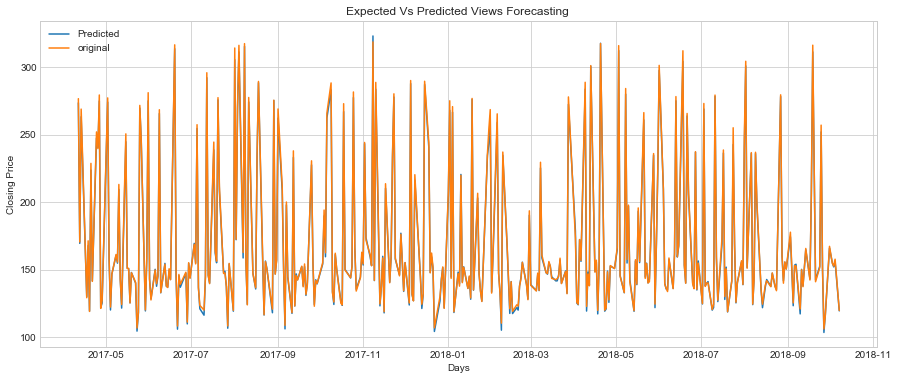

In [78]:
plot.figure(figsize=(15, 6))
labels={'Predicted','original'}
plot.plot(x,y)
plot.grid(axis='y', linestyle='-')
plot.title('Expected Vs Predicted Views Forecasting ')
plot.xlabel('Days')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()

In [ ]:

labels={'Predicted','original'}
plot.plot(Actual, color= 'blue')
plot.plot(Predictions, color = 'red')
plot.title('Expected Vs Predicted Views Forecasting ')
plot.xlabel('Days')
plot.ylabel('Total Views')
plot.legend(labels)
plot.show()

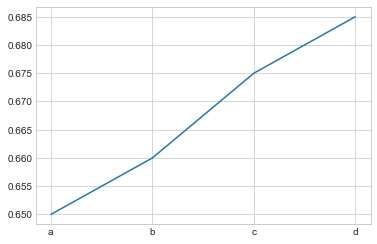

In [65]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([0,1,2,3])
y = np.array([0.650, 0.660, 0.675, 0.685])
my_xticks = ['a', 'b', 'c', 'd']
plt.xticks(x, my_xticks)
plt.yticks(np.arange(y.min(), y.max(), 0.005))
plt.plot(x, y)
plt.grid(axis='y', linestyle='-')
plt.show()